# Zonal and Meridional profiles 

This notebook shows how to plot the zonal or meridional profiles for a variable of choice.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua import Reader
from aqua.graphics import plot_lat_lon_profiles

/LUMI_TYKKY_KrYnNEo/miniconda/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We import some sample data, specifically the monthly ERA5 dataset, along with the IFS-NEMO data:

In [3]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly")
data = reader.retrieve()

reader_ref = Reader(model="ERA5", exp="era5", source="monthly")
data_ref = reader_ref.retrieve()


2025-09-15 09:27:26 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-09-15 09:27:26 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the 

This is how the dataset is characterised:

In [4]:
data

<xarray.Dataset> Size: 19GB
Dimensions:    (time: 146, lat: 180, lon: 360, level: 75, plev: 19)
Coordinates:
  * time       (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * level      (level) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level  (level) int64 600B dask.array<chunksize=(75,), meta=np.ndarray>
  * plev       (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Data variables: (12/36)
    2t         (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hc700m     (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    siconc     (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sithick    (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    so         (time, level, lat, lon) float64 6GB dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    sos        (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...         ...
    t          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
    tcc        (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tciw       (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tclw       (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(9, 19, 180, 360), meta=np.ndarray>
    v          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2025-09-15 09:27:53 AQUA💧: Retrieved from IFS-NEMO_historical...

We select the first variable, `tos`:

In [5]:
tos = data["tos"]
tos_ref = data_ref["tos"]

tos_single = tos.isel(time=1)
tos_ref_single = tos_ref.isel(time=1)

tos_zonal = tos_single.mean(dim='lon')
tos_ref_zonal = tos_ref_single.mean(dim='lon')

## Single profile with one line

And this is how the single zonal profile, as well as the ERA5 reference data, can be plotted:

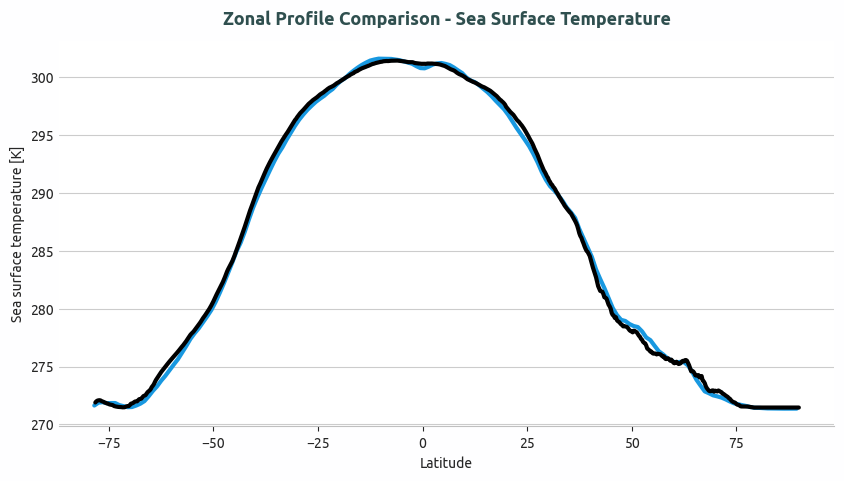

In [6]:
fig_with_ref, ax_with_ref = plot_lat_lon_profiles(
    data=tos_zonal,
    ref_data=tos_ref_zonal,
    title="Zonal Profile Comparison - Sea Surface Temperature"
)

## Single profile with multiple lines

We select other two variables from the ERA5 dataset, `t` and `t2m`, but the other lines can also be different models for the same variable, for instance.

In [7]:
t_model = data["t"]  # Atmospheric temperature on pressure levels
t2m_model = data["2t"]  # 2m temperature

# Select same timestep and calculate zonal means
t_model_single = t_model.isel(time=1)
t2m_model_single = t2m_model.isel(time=1)

# Select specific pressure levels and calculate zonal means
t_1000_zonal = t_model_single.sel(plev=100000).mean(dim='lon')  # 1000 hPa
t_850_zonal = t_model_single.sel(plev=85000).mean(dim='lon')   # 850 hPa
t_700_zonal = t_model_single.sel(plev=70000).mean(dim='lon')   # 700 hPa
t2m_zonal = t2m_model_single.mean(dim='lon')  # Surface

data_list = [t2m_zonal, t_1000_zonal, t_850_zonal, t_700_zonal]
labels_list = ["2m Temperature", "1000 hPa Temperature", "850 hPa Temperature", "700 hPa Temperature"]

And here we use the `plot_lat_lon_profiles` function with `data_list`, so that multiple lines can be plotted:

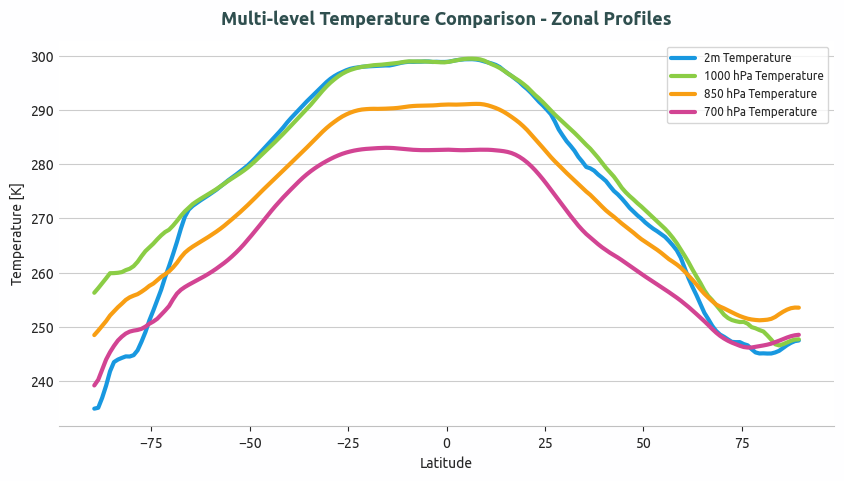

In [8]:
fig_multi, ax_multi = plot_lat_lon_profiles(
    data=data_list,
    data_labels=labels_list,
    title="Multi-level Temperature Comparison - Zonal Profiles"
)

## Multiple subplots of a single line

We now plot, for `tos`, a more complex visualization composed of 4 seasonal subplots, where the seasonal mean is plotted for the variable of interest, and an additional plot showing the annual mean for the zonal profile.

First we compute the seasonal and annual means for both the model and reference data:

In [9]:
# First, get monthly means
tos_monthly = reader.timmean(tos, freq='monthly')
tos_ref_monthly = reader_ref.timmean(tos_ref, freq='monthly')

# Then compute seasonal means
tos_seasonal = reader.timmean(tos_monthly, freq='seasonal')
tos_ref_seasonal = reader_ref.timmean(tos_ref_monthly, freq='seasonal')

# And annual means
tos_annual = reader.timmean(tos_monthly, freq='annual')
tos_ref_annual = reader_ref.timmean(tos_ref_monthly, freq='annual')

# Calculate zonal means for seasonal data
# Extract individual seasons from the seasonal dataset and compute zonal means
tos_seasonal_means = tos_seasonal.groupby('time.season').mean('time')
tos_ref_seasonal_means = tos_ref_seasonal.groupby('time.season').mean('time')

tos_seasonal_zonal = [
    tos_seasonal_means.sel(season='DJF').mean(dim='lon'),
    tos_seasonal_means.sel(season='MAM').mean(dim='lon'),
    tos_seasonal_means.sel(season='JJA').mean(dim='lon'),
    tos_seasonal_means.sel(season='SON').mean(dim='lon')
]

tos_ref_seasonal_zonal = [
    tos_ref_seasonal_means.sel(season='DJF').mean(dim='lon'),
    tos_ref_seasonal_means.sel(season='MAM').mean(dim='lon'),
    tos_ref_seasonal_means.sel(season='JJA').mean(dim='lon'),
    tos_ref_seasonal_means.sel(season='SON').mean(dim='lon')
]

# Calculate zonal mean for annual data
tos_annual_zonal = tos_annual.mean(dim='lon')
tos_ref_annual_zonal = tos_ref_annual.mean(dim='lon')

## Computing standard deviations

In addition, the standard deviation (for both the model and the reference data) can be plotted as shaded bands around the mean profiles. We first compute the std:

In [10]:
# Calculate seasonal and annual standard deviations
# Group monthly data by season and compute std
tos_seasonal_std = tos_monthly.groupby('time.season').std('time')
tos_ref_seasonal_std = tos_ref_monthly.groupby('time.season').std('time')

# For annual std, group by year then compute std across years
tos_annual_grouped = tos_monthly.groupby('time.year').mean('time')
tos_annual_std = tos_annual_grouped.std('year')
# Take the mean across all years for the annual data
tos_annual_zonal = tos_annual.mean(dim=['time', 'lon'])
tos_ref_annual_zonal = tos_ref_annual.mean(dim=['time', 'lon'])
tos_ref_annual_grouped = tos_ref_monthly.groupby('time.year').mean('time')
tos_ref_annual_std = tos_ref_annual_grouped.std('year')

# Calculate zonal means for ref std data
tos_ref_seasonal_std_zonal = [tos_ref_seasonal_std.sel(season=s).mean(dim='lon') 
                             for s in ['DJF', 'MAM', 'JJA', 'SON']]

tos_annual_std_zonal = tos_annual_std.mean(dim='lon')
tos_ref_annual_std_zonal = tos_ref_annual_std.mean(dim='lon')

Now we can create the seasonal plots with standard deviation bands:

/LUMI_TYKKY_KrYnNEo/miniconda/envs/env1/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/pfs/lustrep3/users/cadaumar/AQUA/src/aqua/graphics/seasonal_means.py:111: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


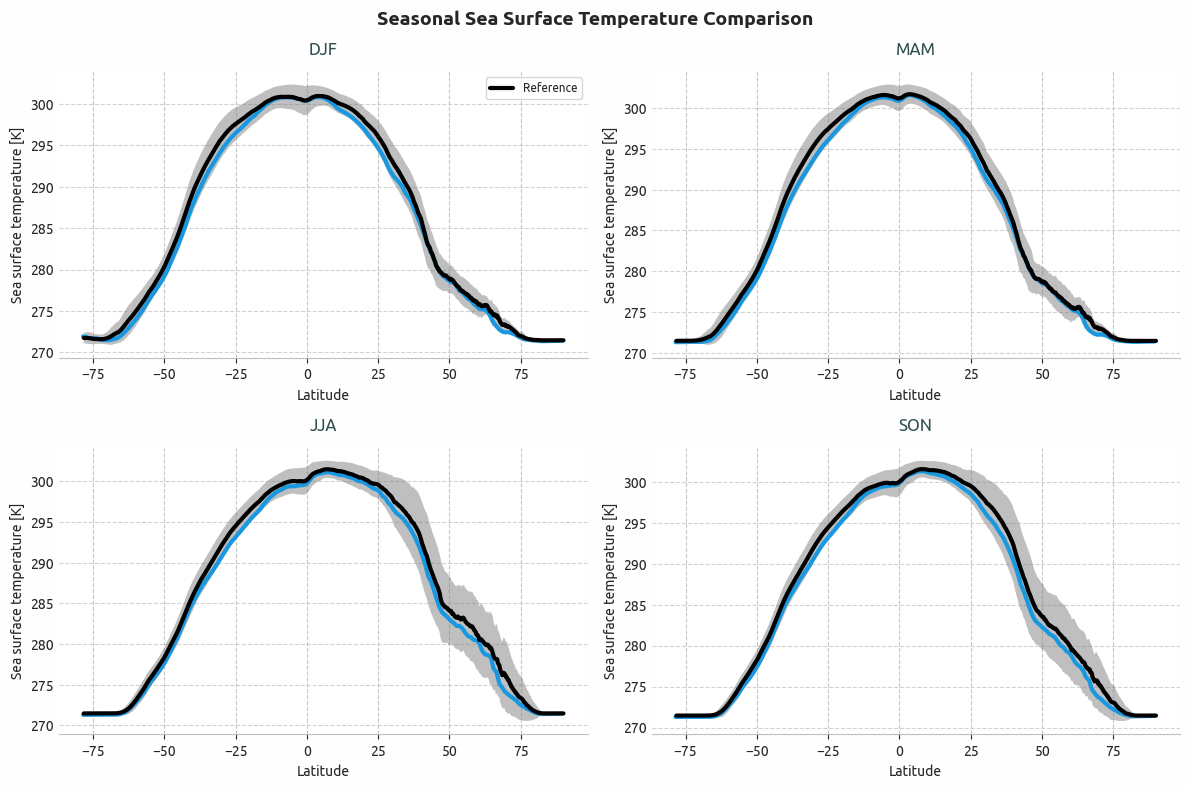

/LUMI_TYKKY_KrYnNEo/miniconda/envs/env1/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [11]:
# Import the seasonal plotting function
from aqua.graphics import plot_seasonal_lat_lon_profiles

# Create 4-panel seasonal plot with std bands
fig_seasonal, axs_seasonal = plot_seasonal_lat_lon_profiles(
    seasonal_data=[[season] for season in tos_seasonal_zonal],  # Wrap each season in a list
    ref_data=tos_ref_seasonal_zonal,
    ref_std_data=tos_ref_seasonal_std_zonal,
    title="Seasonal Sea Surface Temperature Comparison"
)

And the annual means plot:

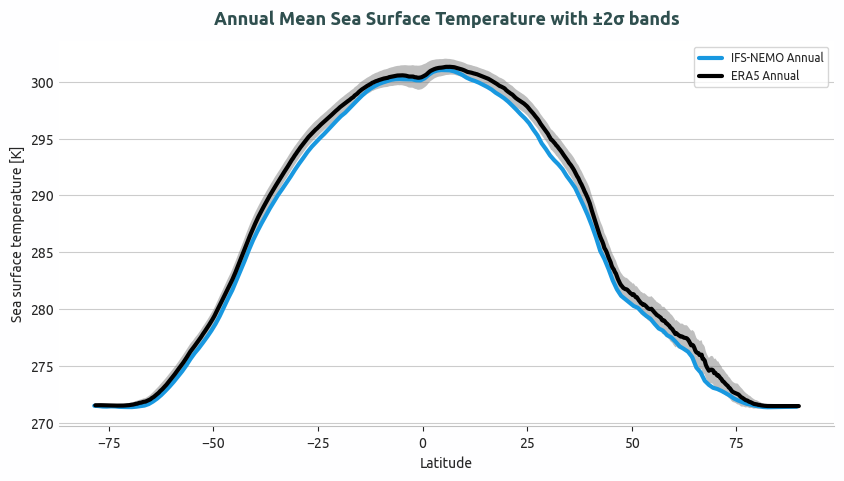

In [12]:
# Annual mean with std bands
fig_annual, ax_annual = plot_lat_lon_profiles(
    data=tos_annual_zonal,
    ref_data=tos_ref_annual_zonal,
    ref_std_data=tos_ref_annual_std_zonal,
    data_labels=["IFS-NEMO Annual"],
    ref_label="ERA5 Annual",
    title="Annual Mean Sea Surface Temperature with ±2σ bands"
)

## Multiple subplots of multiple lines

We now create the same 4-panel seasonal layout but with multiple temperature variables plotted in each subplot. This allows us to compare different atmospheric levels (surface, 1000 hPa, 850 hPa, 700 hPa) across all four seasons simultaneously.

/pfs/lustrep3/users/cadaumar/AQUA/src/aqua/graphics/seasonal_means.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize='small', loc='upper right')
/pfs/lustrep3/users/cadaumar/AQUA/src/aqua/graphics/seasonal_means.py:111: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


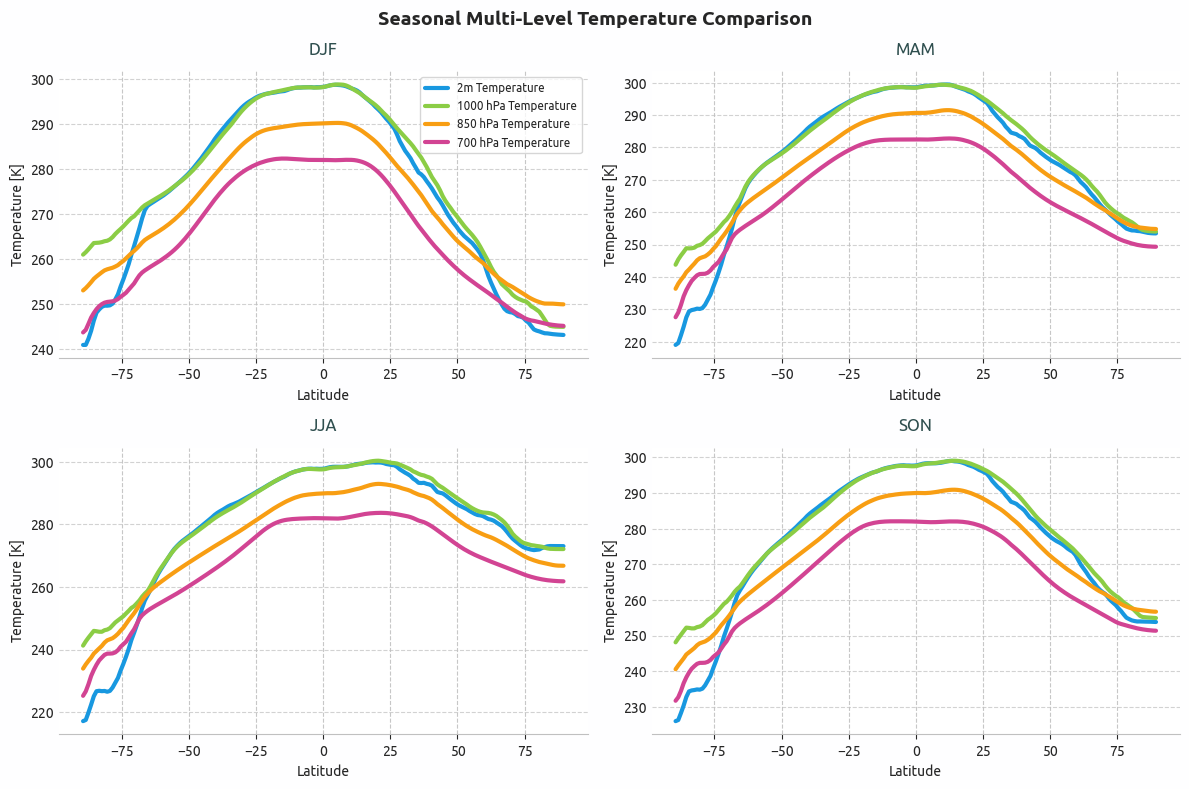

In [13]:
# Calculate seasonal means for temperature data (similar to what we did for tos)
t_monthly = reader.timmean(t_model, freq='monthly')
t2m_monthly = reader.timmean(t2m_model, freq='monthly')

t_seasonal = reader.timmean(t_monthly, freq='seasonal')
t2m_seasonal = reader.timmean(t2m_monthly, freq='seasonal')

# Group by season and calculate means
t_seasonal_means = t_seasonal.groupby('time.season').mean('time')
t2m_seasonal_means = t2m_seasonal.groupby('time.season').mean('time')

# Prepare multi-level temperature data for each season
seasonal_multi_data = []
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    # Select specific pressure levels and calculate zonal means for each season
    t_1000_zonal = t_seasonal_means.sel(season=season, plev=100000).mean(dim='lon')  # 1000 hPa
    t_850_zonal = t_seasonal_means.sel(season=season, plev=85000).mean(dim='lon')   # 850 hPa
    t_700_zonal = t_seasonal_means.sel(season=season, plev=70000).mean(dim='lon')   # 700 hPa
    t2m_zonal = t2m_seasonal_means.sel(season=season).mean(dim='lon')  # Surface
    
    # Create list of data for this season
    season_data = [t2m_zonal, t_1000_zonal, t_850_zonal, t_700_zonal]
    seasonal_multi_data.append(season_data)

# Create 4-panel seasonal plot with multiple temperature levels
fig_seasonal_multi, axs_seasonal_multi = plot_seasonal_lat_lon_profiles(
    seasonal_data=seasonal_multi_data,
    title="Seasonal Multi-Level Temperature Comparison",
)

# Add legend to the first subplot using the existing labels_list
axs_seasonal_multi[0].legend(labels_list, fontsize='small', loc='best')